<a href="https://colab.research.google.com/github/Epulvis/Tubes-AKA/blob/main/Tugas_Besar_AKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perbandingan Algoritma Levenshtein Distance dengan menggunakan  Rekursif dan Iteratif

In [36]:
from time import time
from functools import lru_cache
import pandas as pd
import matplotlib.pyplot as plt

## Algoritma Levenshtein Distance dengan menggunakan Rekursif

In [1]:
def levenshtein_recursive(str1, str2):
    if len(str1) == 0:
        return len(str2)
    if len(str2) == 0:
        return len(str1)
    if str1[0] == str2[0]:
        return levenshtein_recursive(str1[1:], str2[1:])
    return 1 + min(
        levenshtein_recursive(str1[1:], str2),
        levenshtein_recursive(str1, str2[1:]),
        levenshtein_recursive(str1[1:], str2[1:])
    )

# Rekursif dengan Memoization digunakan dalam ujicoba string diatas 10
@lru_cache(maxsize=None)
def levenshtein_recursive_memo(str1, str2):
    if len(str1) == 0:
        return len(str2)
    if len(str2) == 0:
        return len(str1)
    if str1[0] == str2[0]:
        return levenshtein_recursive_memo(str1[1:], str2[1:])
    return 1 + min(
        levenshtein_recursive_memo(str1[1:], str2),
        levenshtein_recursive_memo(str1, str2[1:]),
        levenshtein_recursive_memo(str1[1:], str2[1:])
    )

## Algoritma Levenshtein Distance dengan menggunakan Iteratif

In [2]:
def levenshtein_iterative(str1, str2):
    rows, cols = len(str1) + 1, len(str2) + 1
    dp = [[0] * cols for _ in range(rows)]
    for i in range(rows): dp[i][0] = i
    for j in range(cols): dp[0][j] = j
    for i in range(1, rows):
        for j in range(1, cols):
            if str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    return dp[-1][-1]

## Eksperimen Perbadingan dengan Panjang string

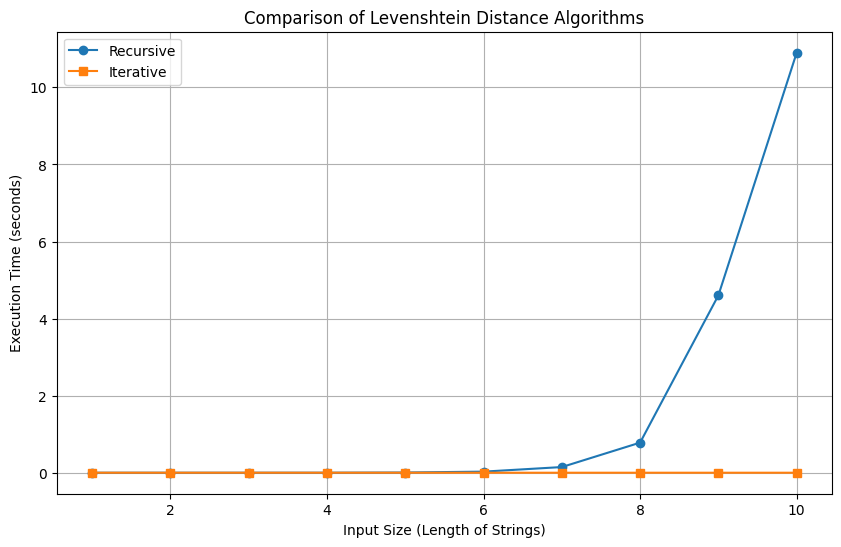

In [3]:
# Data untuk eksperimen
test_lengths = list(range(1, 11))  # Panjang string 1 hingga 10
str1_base = "a" * 10
str2_base = "b" * 10

# Waktu eksekusi
recursive_times = []
iterative_times = []

for n in test_lengths:
    str1, str2 = str1_base[:n], str2_base[:n]

    # Rekursif
    start = time()
    levenshtein_recursive(str1, str2)
    recursive_times.append(time() - start)

    # Iteratif
    start = time()
    levenshtein_iterative(str1, str2)
    iterative_times.append(time() - start)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(test_lengths, recursive_times, label="Recursive", marker="o")
plt.plot(test_lengths, iterative_times, label="Iterative", marker="s")
plt.title("Comparison of Levenshtein Distance Algorithms")
plt.xlabel("Input Size (Length of Strings)")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid()
plt.show()

## Eksperimen Perbadingan dengan Perbedaan Kata

### Data uji dengan 1 kata bertambah dan setiap huruf memiliki satu kesalahan tambahan

In [32]:
def introduce_errors(word, num_errors):
    word = list(word)  # Ubah ke list agar bisa diubah
    if num_errors > len(word):
        num_errors = len(word)

    import random
    error_indices = random.sample(range(len(word)), num_errors)

    for i in error_indices:
        # Ganti karakter dengan karakter acak (kecuali karakter asli)
        word[i] = random.choice([chr(j) for j in range(ord('a'), ord('z') + 1) if chr(j) != word[i]])

    return "".join(word)

def generate_test_cases(base_words, max_errors):
    """Menghasilkan data uji dengan variasi kesalahan."""
    test_cases = []
    for word in base_words:
        for i in range(0, len(word) + 1):  # 0 kesalahan hingga semua kesalahan
            error_word = introduce_errors(word, i)
            test_cases.append((word, error_word))
    return test_cases

# Kata dasar
base_words = ["algoritma"]

# Generate test cases dengan maksimal 2 kesalahan per kata
test_words = generate_test_cases(base_words, max_errors=2)


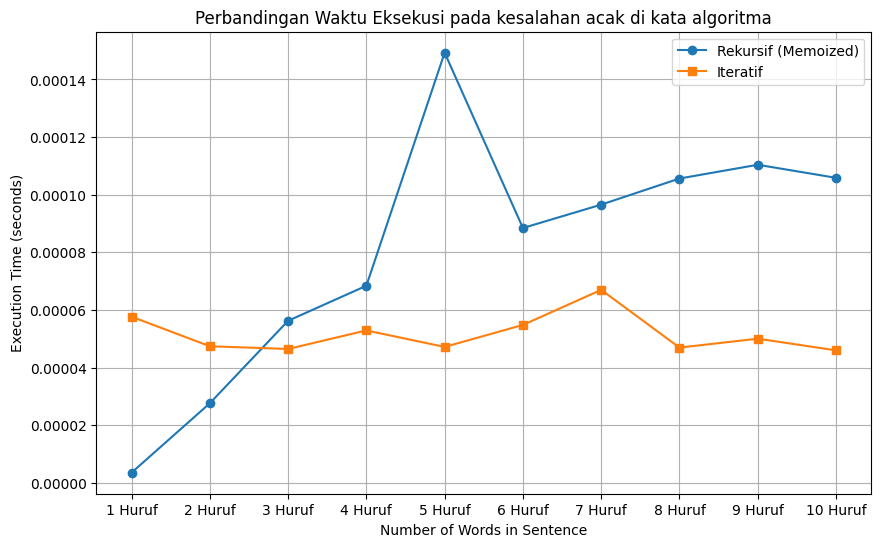

In [33]:
# Ulangi analisis dengan memoization
recursive_data = []
iterative_data = []

for str1, str2 in test_words:
    # Rekursif dengan Memoization
    start = time()
    recursive_distance = levenshtein_recursive_memo(str1, str2)
    recursive_time = time() - start
    recursive_data.append((str1, str2, recursive_distance, recursive_time))

    # Iteratif
    start = time()
    iterative_distance = levenshtein_iterative(str1, str2)
    iterative_time = time() - start
    iterative_data.append((str1, str2, iterative_distance, iterative_time))

# Konversi ke DataFrame untuk tampilan yang lebih rapi
recursive_df = pd.DataFrame(recursive_data, columns=["String 1", "String 2", "Distance", "Execution Time"])
iterative_df = pd.DataFrame(iterative_data, columns=["String 1", "String 2", "Distance", "Execution Time"])

recursive_df, iterative_df

# Visualisasi hasil perbandingan waktu eksekusi
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(test_words) + 1), recursive_df["Execution Time"], label="Rekursif (Memoized)", marker="o")
plt.plot(range(1, len(test_words) + 1), iterative_df["Execution Time"], label="Iteratif", marker="s")
plt.title("Perbandingan Waktu Eksekusi pada kesalahan acak di kata algoritma")
plt.xlabel("Number of Words in Sentence")
plt.ylabel("Execution Time (seconds)")
plt.xticks(range(1, len(test_words) + 1), [f"{i} Huruf" for i in range(1, len(test_words) + 1)])
plt.legend()
plt.grid()
plt.show()

### Data uji dengan panjang kata bertambah dan setiap kata memiliki satu kesalahan tambahan

In [35]:
# Data uji dengan panjang kata bertambah dan setiap kata memiliki satu kesalahan tambahan
test_words = [
    ("saya", "saua"),
    ("saya suka", "saua suka"),
    ("saya suka makan", "saua suka makan"),
    ("saya suka makan nasi", "saua suka makan nasi"),
    ("saya suka makan nasi goreng", "saua suka makan nasi gorong")
]

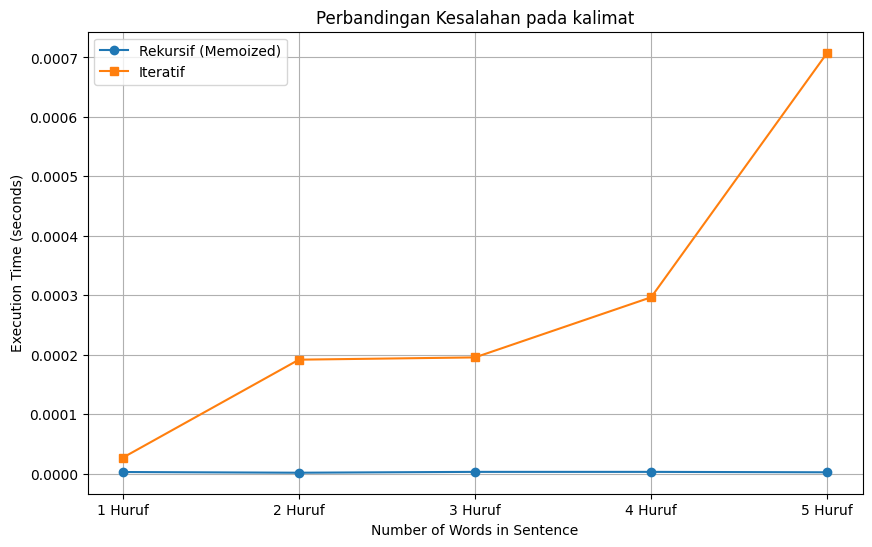

In [38]:
# Ulangi analisis dengan memoization
recursive_data = []
iterative_data = []

for str1, str2 in test_words:
    # Rekursif dengan Memoization
    start = time()
    recursive_distance = levenshtein_recursive_memo(str1, str2)
    recursive_time = time() - start
    recursive_data.append((str1, str2, recursive_distance, recursive_time))

    # Iteratif
    start = time()
    iterative_distance = levenshtein_iterative(str1, str2)
    iterative_time = time() - start
    iterative_data.append((str1, str2, iterative_distance, iterative_time))

# Konversi ke DataFrame untuk tampilan yang lebih rapi
recursive_df = pd.DataFrame(recursive_data, columns=["String 1", "String 2", "Distance", "Execution Time"])
iterative_df = pd.DataFrame(iterative_data, columns=["String 1", "String 2", "Distance", "Execution Time"])

recursive_df, iterative_df

# Visualisasi hasil perbandingan waktu eksekusi
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(test_words) + 1), recursive_df["Execution Time"], label="Rekursif (Memoized)", marker="o")
plt.plot(range(1, len(test_words) + 1), iterative_df["Execution Time"], label="Iteratif", marker="s")
plt.title("Perbandingan Kesalahan pada kalimat")
plt.xlabel("Number of Words in Sentence")
plt.ylabel("Execution Time (seconds)")
plt.xticks(range(1, len(test_words) + 1), [f"{i} Huruf" for i in range(1, len(test_words) + 1)])
plt.legend()
plt.grid()
plt.show()

### Data uji dengan 1 kalimat dan setiap huruf memiliki satu kesalahan tambahan

In [67]:
#kalimat yang digunakan dalam ujicoba akan dihapus jarak spasi agar lebih akurat Execution Timenya
test_words = generate_test_cases("SpiderManAcrosstheSpiderVerse", max_errors=2)

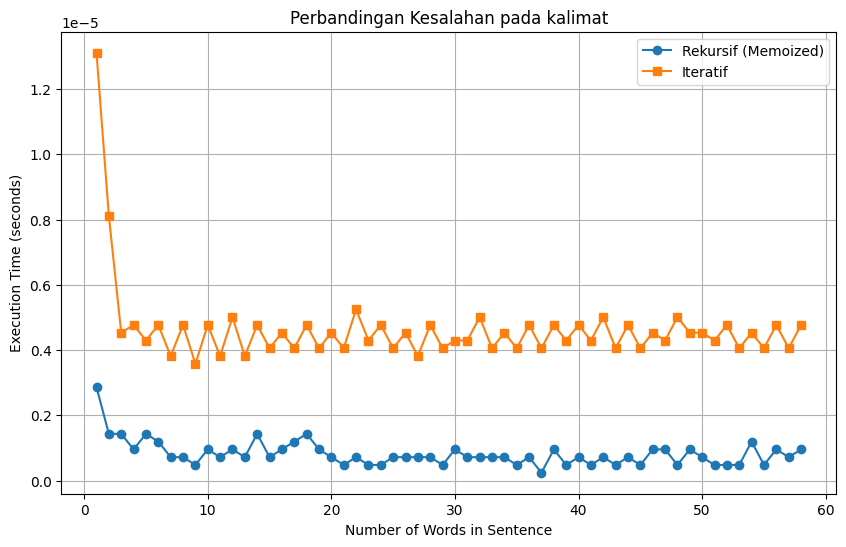

In [69]:
# Ulangi analisis dengan memoization
recursive_data = []
iterative_data = []

for str1, str2 in test_words:
    # Rekursif dengan Memoization
    start = time()
    recursive_distance = levenshtein_recursive_memo(str1, str2)
    recursive_time = time() - start
    recursive_data.append((str1, str2, recursive_distance, recursive_time))

    # Iteratif
    start = time()
    iterative_distance = levenshtein_iterative(str1, str2)
    iterative_time = time() - start
    iterative_data.append((str1, str2, iterative_distance, iterative_time))

# Konversi ke DataFrame untuk tampilan yang lebih rapi
recursive_df = pd.DataFrame(recursive_data, columns=["String 1", "String 2", "Distance", "Execution Time"])
iterative_df = pd.DataFrame(iterative_data, columns=["String 1", "String 2", "Distance", "Execution Time"])

recursive_df, iterative_df

# Visualisasi hasil perbandingan waktu eksekusi
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(test_words) + 1), recursive_df["Execution Time"], label="Rekursif (Memoized)", marker="o")
plt.plot(range(1, len(test_words) + 1), iterative_df["Execution Time"], label="Iteratif", marker="s")
plt.title("Perbandingan Kesalahan pada kalimat")
plt.xlabel("Number of Words in Sentence")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid()
plt.show()